In [1]:

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from matplotlib import pyplot as plt
!pip install utm


!pip install geopandas
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
from shapely.geometry import Point
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from pyproj import Proj
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
import pyproj
from pyproj import Proj
print('Folium installed')
print('Libraries imported.')

  Running setup.py bdist_wheel for utm ... done
  Stored in directory: /home/dsxuser/.cache/pip/wheels/1d/2d/5a/4c6320941f607ffefd353e1bb715e33a250a59f835cf0fbdd8
Successfully built utm
    100% |████████████████████████████████| 931kB 1.1MB/s eta 0:00:01
    100% |████████████████████████████████| 1.5MB 689kB/s eta 0:00:01
    100% |████████████████████████████████| 17.9MB 55kB/s  eta 0:00:01
Requirement not upgraded as not directly required: pandas in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from geopandas)
    100% |████████████████████████████████| 10.8MB 95kB/s  eta 0:00:01
Requirement not upgraded as not directly required: six>=1.7 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from fiona->geopandas)
Requirement not upgraded as not directly required: click<8,>=4.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from fiona->geopandas)
Requirement not upgraded as not directly required: python-dateutil>=2 in /opt/conda/envs/DSX-Python35/li

In [2]:
london=pd.read_csv('https://data.london.gov.uk/download/country-of-birth/aeeb0b0a-5b2f-48b3-a53e-e6c525858b31/cob-borough.csv')
london.head()

,Year,Area_Code,Area_Name,Broad_group,Detailed_group,Estimate,CI
0,2017,E09000001,City of London,Total,Total,:,:
1,2017,E09000002,Barking and Dagenham,Total,Total,210,z
2,2017,E09000003,Barnet,Total,Total,391,z
3,2017,E09000004,Bexley,Total,Total,247,z
4,2017,E09000005,Brent,Total,Total,333,z


In [3]:
london['Detailed_group'].unique()

array(['Total', 'United Kingdom', 'Non-United Kingdom', 'All',
       'European Union EU14', 'European Union EU8', 'European Union EU2',
       'European Union Other', 'Other Europe',
       'Middle East and Central Asia', 'East Asia', 'South Asia',
       'South East Asia', 'Sub-Saharan Africa', 'North Africa',
       'North America', 'Central and South America', 'Oceania'], dtype=object)

In [4]:
to_drop=['England','United Kingdom','Northern Ireland','Scotland','Wales','South West','South East','London','East','West Midlands','East Midlands','Yorkshire and The Humber ','North West','North East','Outer London','Inner London']
london_bro=london[~london.Area_Name.isin(to_drop)]


In [5]:
CLIENT_ID = 'HHCMYTG5RHQHVZRJAPYYFEN0WK04Y4ZQILHSUN0GZMJI0RV5' # your Foursquare ID
CLIENT_SECRET = 'A2C5UNLQYO253NL2WCSUVAAIHTO1RWNTIHO0P2L4FGLITLEP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HHCMYTG5RHQHVZRJAPYYFEN0WK04Y4ZQILHSUN0GZMJI0RV5
CLIENT_SECRET:A2C5UNLQYO253NL2WCSUVAAIHTO1RWNTIHO0P2L4FGLITLEP


In [6]:
address = 'City of London, UK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitudelon = location.latitude
longitudelon = location.longitude
print('The geograpical coordinate of City of London are {}, {}.'.format(latitudelon, longitudelon))

The geograpical coordinate of City of London are 51.5156177, -0.0919983.


In [7]:
area=london_bro['Area_Name'].unique()

In [8]:
len(area)

33

In [9]:
latlon=[]
for x in area:
    i=0
    address=x
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    latlon[:i]=[{'Area_Name':x, 'latitude':latitude,'longitude':longitude}]
    i=+1


In [10]:
latlon=pd.DataFrame(latlon)
latlon.head()

,Area_Name,latitude,longitude
0,Westminster,51.497321,-0.137149
1,Wandsworth,51.457027,-0.193261
2,Waltham Forest,51.556999,-0.005835
3,Tower Hamlets,51.128863,1.298669
4,Sutton,51.357511,-0.173640


In [11]:
london_boro=pd.merge(london_bro,latlon, on=['Area_Name'])
london_boro=london_boro[~london_boro.Estimate.str.contains('c')]
london_boro=london_boro[~london_boro.Estimate.str.contains('z')]
london_boro=london_boro[~london_boro.Estimate.str.contains(':')]
london_boro = london_boro[~london_boro['Estimate'].isin(['.'])]


In [12]:
london_boro

,Year,Area_Code,Area_Name,Broad_group,Detailed_group,Estimate,CI,latitude,longitude
280,2017,E09000002,Barking and Dagenham,Total,Total,210,z,51.554117,0.150504
281,2017,E09000002,Barking and Dagenham,United Kingdom,United Kingdom,130,17,51.554117,0.150504
282,2017,E09000002,Barking and Dagenham,Non-United Kingdom,Non-United Kingdom,80,14,51.554117,0.150504
283,2017,E09000002,Barking and Dagenham,European Union,All,24,7,51.554117,0.150504
284,2017,E09000002,Barking and Dagenham,European Union,European Union EU14,7,4,51.554117,0.150504
285,2017,E09000002,Barking and Dagenham,European Union,European Union EU8,10,5,51.554117,0.150504
286,2017,E09000002,Barking and Dagenham,European Union,European Union EU2,7,4,51.554117,0.150504
288,2017,E09000002,Barking and Dagenham,Other Europe,Other Europe,5,3,51.554117,0.150504
289,2017,E09000002,Barking and Dagenham,Asia,All,29,8,51.554117,0.150504
290,2017,E09000002,Barking and Dagenham,Asia,Middle East and Central Asia,2,2,51.554117,0.150504


In [13]:
london_areas=london_boro[['Area_Name','latitude','longitude']]
london_areas_unique=london_areas.drop_duplicates()
london_areas_unique

,Area_Name,latitude,longitude
280,Barking and Dagenham,51.554117,0.150504
560,Barnet,44.297316,-72.049713
840,Bexley,51.441679,0.150488
1120,Brent,39.054783,-84.433552
1400,Bromley,51.402805,0.014814
1680,Camden,39.944840,-75.119891
1960,Croydon,51.371305,-0.101957
2240,Ealing,51.512655,-0.305195
2520,Enfield,51.652085,-0.081018
2800,Greenwich,52.036732,1.168934


In [14]:
categoryID = '4bf58dd8d48988d1cd941735'
radius = 50000
print(categoryID + ' .... OK!')
LIMIT = 500

4bf58dd8d48988d1cd941735 .... OK!


In [15]:
url=[]
for index,row in latlon.iterrows():
    i=0
    latitude=row['latitude']
    longitude=row['longitude']
    area=row['Area_Name']
    area_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, categoryID ,radius, LIMIT)
    url[:i]=[{'Area_Name': area, 'url': area_url}]
    i+=1
urldf=pd.DataFrame(url)
urldf.iloc[0,1]

'https://api.foursquare.com/v2/venues/search?client_id=HHCMYTG5RHQHVZRJAPYYFEN0WK04Y4ZQILHSUN0GZMJI0RV5&client_secret=A2C5UNLQYO253NL2WCSUVAAIHTO1RWNTIHO0P2L4FGLITLEP&ll=51.5156177,-0.0919983&v=20180605&categoryId=4bf58dd8d48988d1cd941735&radius=50000&limit=500'

In [16]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, categoryID, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=HHCMYTG5RHQHVZRJAPYYFEN0WK04Y4ZQILHSUN0GZMJI0RV5&client_secret=A2C5UNLQYO253NL2WCSUVAAIHTO1RWNTIHO0P2L4FGLITLEP&ll=51.5156177,-0.0919983&v=20180605&categoryId=4bf58dd8d48988d1cd941735&radius=50000&limit=500'

In [17]:
df=[]
venues=[]
for index,row in urldf.iterrows() : 
    area=row['Area_Name']
    results = requests.get(row['url']).json()
    # assign relevant part of JSON to venues
    v = results['response']['venues']
    venues=venues+v

dataframe = json_normalize(v)

#dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'name': 'Argentinian Restaurant', 'pluralNam...",False,5297cef6498e8b3781962323,43 Vauxhall Bridge Road,GB,London,United Kingdom,Charlwood Street,686,"[43 Vauxhall Bridge Road (Charlwood Street), L...","[{'lat': 51.491300736324504, 'label': 'display...",51.491301,-0.134998,NaN,SW1V 2TA,Greater London,Moo Cantina,v-1554069614,NaN
1,"[{'name': 'Latin American Restaurant', 'plural...",False,50b3f12be4b0923cb6ef914e,118 Piccadilly,GB,London,United Kingdom,Old Park Lane,1069,"[118 Piccadilly (Old Park Lane), London, Great...","[{'lat': 51.50430866903813, 'label': 'display'...",51.504309,-0.147741,NaN,W1J 7NW,Greater London,Coya London,v-1554069614,94098734
2,"[{'name': 'Argentinian Restaurant', 'pluralNam...",False,5a6c780f2347246ed4896a72,132 Southwark Bridge Rd,GB,London,United Kingdom,NaN,2668,"[132 Southwark Bridge Rd, London, Greater Lond...","[{'lat': 51.500664, 'label': 'display', 'lng':...",51.500664,-0.099020,Southwark,SE1 0DG,Greater London,Chimichurris,v-1554069614,NaN
3,"[{'name': 'Peruvian Restaurant', 'pluralName':...",False,5afc80d4dd12f8002ce19f81,157 Westbourne Grove,GB,London,United Kingdom,NaN,4551,"[157 Westbourne Grove, London, Greater London,...","[{'lat': 51.514901, 'label': 'display', 'lng':...",51.514901,-0.196463,NaN,W11 2RS,Greater London,Andina Notting Hill,v-1554069614,NaN
4,"[{'name': 'Peruvian Restaurant', 'pluralName':...",False,52988940498e725c6a9df38f,1 Redchurch St,GB,London,United Kingdom,Shoreditch High St,5141,"[1 Redchurch St (Shoreditch High St), London, ...","[{'lat': 51.52436530783196, 'label': 'display'...",51.524365,-0.076982,NaN,E2 7DJ,Greater London,Andina,v-1554069614,73632919


In [18]:
dataframe.shape

(50, 19)

In [19]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Moo Cantina,Argentinian Restaurant,43 Vauxhall Bridge Road,GB,London,United Kingdom,Charlwood Street,686,"[43 Vauxhall Bridge Road (Charlwood Street), L...","[{'lat': 51.491300736324504, 'label': 'display...",51.491301,-0.134998,NaN,SW1V 2TA,Greater London,5297cef6498e8b3781962323
1,Coya London,Latin American Restaurant,118 Piccadilly,GB,London,United Kingdom,Old Park Lane,1069,"[118 Piccadilly (Old Park Lane), London, Great...","[{'lat': 51.50430866903813, 'label': 'display'...",51.504309,-0.147741,NaN,W1J 7NW,Greater London,50b3f12be4b0923cb6ef914e
2,Chimichurris,Argentinian Restaurant,132 Southwark Bridge Rd,GB,London,United Kingdom,NaN,2668,"[132 Southwark Bridge Rd, London, Greater Lond...","[{'lat': 51.500664, 'label': 'display', 'lng':...",51.500664,-0.099020,Southwark,SE1 0DG,Greater London,5a6c780f2347246ed4896a72
3,Andina Notting Hill,Peruvian Restaurant,157 Westbourne Grove,GB,London,United Kingdom,NaN,4551,"[157 Westbourne Grove, London, Greater London,...","[{'lat': 51.514901, 'label': 'display', 'lng':...",51.514901,-0.196463,NaN,W11 2RS,Greater London,5afc80d4dd12f8002ce19f81
4,Andina,Peruvian Restaurant,1 Redchurch St,GB,London,United Kingdom,Shoreditch High St,5141,"[1 Redchurch St (Shoreditch High St), London, ...","[{'lat': 51.52436530783196, 'label': 'display'...",51.524365,-0.076982,NaN,E2 7DJ,Greater London,52988940498e725c6a9df38f
5,Monmouth Kitchen,Peruvian Restaurant,20 Mercer St,GB,London,United Kingdom,NaN,2000,"[20 Mercer St, London, Greater London, WC2H 9H...","[{'lat': 51.51414598849144, 'label': 'display'...",51.514146,-0.126997,NaN,WC2H 9HD,Greater London,57caf71c498ea577c4429cb4
6,Coya Angel Court,Peruvian Restaurant,31-33 Throgmorton Street,GB,London,United Kingdom,NaN,3972,"[31-33 Throgmorton Street, London, Greater Lon...","[{'lat': 51.5149821429662, 'label': 'display',...",51.514982,-0.087338,NaN,E C2N,Greater London,58ff93cbf96b2c4b5019dfec
7,Zoilo,Argentinian Restaurant,9 Duke St,GB,London,United Kingdom,NaN,2327,"[9 Duke St, London, Greater London, W1U 3EG, U...","[{'lat': 51.51599484488055, 'label': 'display'...",51.515995,-0.152260,NaN,W1U 3EG,Greater London,509147d4e4b045f756c349f5
8,Tupi,Brazilian Restaurant,"2 CASTLE SQUARE, ELEPHANT ROAD",GB,London,United Kingdom,NaN,2728,"[2 CASTLE SQUARE, ELEPHANT ROAD, London, Great...","[{'lat': 51.494115, 'label': 'display', 'lng':...",51.494115,-0.098118,NaN,SE17 1EN,Greater London,5b96cd6cf5e9d7002c78164b
9,Assenheim 56,South American Restaurant,NaN,GB,NaN,United Kingdom,NaN,2987,[United Kingdom],"[{'lat': 51.51350724450921, 'label': 'display'...",51.513507,-0.102752,NaN,NaN,NaN,55deffb5498ea1f5717c051b


In [20]:
# create map of New York using latitude and longitude values
map_london = folium.Map(location=[latitudelon, longitudelon], zoom_start=11)


# add markers to map
for lat, lng, borough in zip(london_areas_unique['latitude'], london_areas_unique['longitude'], london_areas_unique['Area_Name']):
    label = '{}'.format( borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=6,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(map_london)

# display map
map_london
    

In [21]:
#Transfrom data from LAT and LON to UTM 
#import utm


#def getUTMs(row):
 #   tup = utm.from_latlon(row.ix[0],row.ix[1])
 #   return pd.Series(tup[:2])

#london_areas_unique[['utmy','utmx']] = london_areas_unique[['latitude','longitude']].apply(getUTMs , axis=1)
#dataframe_filtered[['utmy','utmx']] = dataframe_filtered[['lat','lng']].apply(getUTMs , axis=1)

areas_a=london_areas_unique.reset_index(drop=True)
areas_a['area_number'] = range(0, len(areas_a))
areas_a

,Area_Name,latitude,longitude,area_number
0,Barking and Dagenham,51.554117,0.150504,0
1,Barnet,44.297316,-72.049713,1
2,Bexley,51.441679,0.150488,2
3,Brent,39.054783,-84.433552,3
4,Bromley,51.402805,0.014814,4
5,Camden,39.944840,-75.119891,5
6,Croydon,51.371305,-0.101957,6
7,Ealing,51.512655,-0.305195,7
8,Enfield,51.652085,-0.081018,8
9,Greenwich,52.036732,1.168934,9


In [22]:
dataframe_filtered_a=dataframe_filtered[['name','lat', 'lng']]
areas_lond=areas_a.Area_Name.values
rest_names=dataframe_filtered_a.name.values
print(areas_lond)
rest_names=rest_names.tolist()


['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith and Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington and Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster']


In [23]:
from scipy.spatial import distance
coord_rest=dataframe_filtered_a[['lat','lng']].values
coord_londo=areas_a[['latitude','longitude']].values

dist=distance.cdist(coord_rest, coord_londo, 'euclidean')
dist_df= pd.DataFrame(dist) 

#from scipy.spatial import distance
#L1=london_areas_unique[['Area_Name','utmx', 'utmy']]
#L2=dataframe_filtered[['name','utmx', 'utmy']]
#L2
#dataframe_filtered['distance'] = london_areas_unique[['utmx', 'utmy']].sub(np.array(L1)).pow(2).sum(1).pow(0.5)

In [24]:
#print(dist_df)
dist_df.columns = areas_lond
dist_df.index= rest_names
#dist_df_1=dist_df.reindex(index=rest_names)
print(dist_df)

                                            Barking and Dagenham     Barnet  \
Moo Cantina                                             0.292331  72.273644   
Coya London                                             0.302376  72.262260   
Chimichurris                                            0.255186  72.310376   
Andina Notting Hill                                     0.349177  72.214840   
Andina                                                  0.229424  72.334668   
Monmouth Kitchen                                        0.280366  72.283883   
Coya Angel Court                                        0.241040  72.323428   
Zoilo                                                   0.305155  72.258931   
Tupi                                                    0.255760  72.310621   
Assenheim 56                                            0.256491  72.307943   
Chotto Matte                                            0.285102  72.279127   
Floripa                                             

In [25]:
rebo=dist_df.idxmin(axis=1)
rebo_df=pd.DataFrame(data=rebo)
rebo_df.reset_index(inplace=True)
rebo_df.columns=['name','Area_Name']
rest_df = pd.concat([dataframe_filtered_a, rebo_df.Area_Name], axis=1, join='inner')
rest_df_a = pd.merge(rest_df, areas_a, how='left', on='Area_Name')
rest_df

,name,lat,lng,Area_Name
0,Moo Cantina,51.491301,-0.134998,Westminster
1,Coya London,51.504309,-0.147741,Westminster
2,Chimichurris,51.500664,-0.099020,Southwark
3,Andina Notting Hill,51.514901,-0.196463,Hammersmith and Fulham
4,Andina,51.524365,-0.076982,Islington
5,Monmouth Kitchen,51.514146,-0.126997,Lambeth
6,Coya Angel Court,51.514982,-0.087338,Southwark
7,Zoilo,51.515995,-0.152260,Westminster
8,Tupi,51.494115,-0.098118,Southwark
9,Assenheim 56,51.513507,-0.102752,Southwark


In [26]:
rest_df['Area_Name'].value_counts()

Westminster               13
Southwark                 13
Islington                  6
Hammersmith and Fulham     4
Kensington and Chelsea     3
Lambeth                    3
Hackney                    2
Ealing                     1
Wandsworth                 1
Richmond upon Thames       1
Haringey                   1
Waltham Forest             1
Harrow                     1
Name: Area_Name, dtype: int64

In [27]:
rest_df_a=rest_df_a.drop(['latitude','longitude'],axis=1)
rest_df_a

,name,lat,lng,Area_Name,area_number
0,Moo Cantina,51.491301,-0.134998,Westminster,31
1,Coya London,51.504309,-0.147741,Westminster,31
2,Chimichurris,51.500664,-0.099020,Southwark,26
3,Andina Notting Hill,51.514901,-0.196463,Hammersmith and Fulham,11
4,Andina,51.524365,-0.076982,Islington,17
5,Monmouth Kitchen,51.514146,-0.126997,Lambeth,20
6,Coya Angel Court,51.514982,-0.087338,Southwark,26
7,Zoilo,51.515995,-0.152260,Westminster,31
8,Tupi,51.494115,-0.098118,Southwark,26
9,Assenheim 56,51.513507,-0.102752,Southwark,26


In [28]:
map_london = folium.Map(location=[latitudelon, longitudelon], zoom_start=11)

import matplotlib.cm as cm
import matplotlib.colors as colors
# add markers to map
for lat, lng, borough in zip(london_areas_unique['latitude'], london_areas_unique['longitude'], london_areas_unique['Area_Name']):
    label = '{}'.format( borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  

    
x = np.arange(len(areas_a.Area_Name))
ys = [i + x + (i*x)**2 for i in range(len(areas_a.Area_Name))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add the Italian restaurants as blue circle markers
#for lat, lng, area in zip(rest_df.lat, rest_df.lng, rest_df.area):
  #  folium.features.CircleMarker(
  #      [lat, lng],
   #     radius=6,
   #     color='red',
    #    popup=label,
    #    fill = True,
    #    fill_color='red',
     #   fill_opacity=0.6,
     #   parse_html=False).add_to(map_london)
    
for lat, lng, poi ,area in zip(rest_df_a.lat, rest_df_a.lng, rest_df_a.Area_Name, rest_df_a.area_number):
    label = folium.Popup(str(poi) + ' Cluster ' + str(area), parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=6,
        color=rainbow[area-1],
        popup=label,
        fill = True,
        fill_color=rainbow[area-1],
        fill_opacity=0.6
    ).add_to(map_london)

# display map
map_london


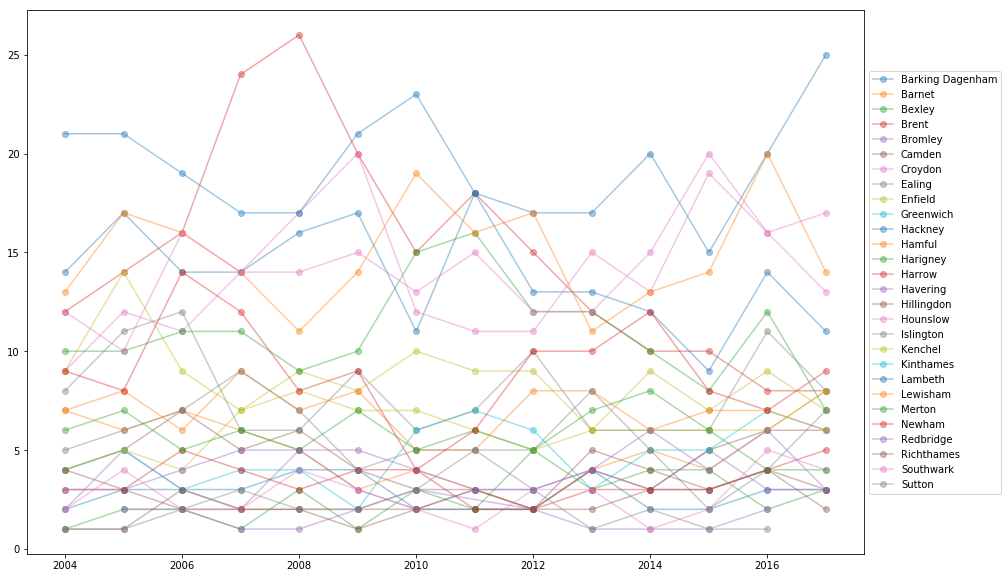

In [29]:
london_boro['Estimate']=london_boro['Estimate'].astype(float)

london_barking_dagenham=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Barking and Dagenham')]
london_barnet=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Barnet')]
london_bexley=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Bexley')]
london_brent=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Brent')]
london_bromley=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Bromley')]
london_camden=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Camden')]
london_croydon=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Croydon')]
london_ealing=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Ealing')]
london_enfield=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Enfield')]
london_greenwich=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Greenwich')]
london_hackney=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Hackney')]
london_hamful=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Hammersmith and Fulham')]
london_haringey=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Haringey')]
london_harrow=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Harrow')]
london_havering=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Havering')]
london_hillingdon=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Hillingdon')]
london_hounslow=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Hounslow')]
london_islington=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Islington')]
london_kenchel=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Kensington and Chelsea')]
london_kinthames=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Kingstone upon Thames')]
london_lambeth=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Lambeth')]
london_lewisham=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Lewisham')]
london_merton=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Merton')]
london_newham=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Newham')]
london_redbridge=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Redbridge')]
london_richthames=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Richmond upon Thames')]
london_southwark=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Southwark')]
london_sutton=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Sutton')]
london_towerhamlets=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Tower Hamlets')]
london_waltham=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Waltham Forest')]
london_wandsworth=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Wandsworth')]
london_westminster=london_boro[(london_boro['Detailed_group']=='Central and South America') & (london_boro['Area_Name']=='Westminster')]


from matplotlib import pyplot as plt

plt.figure(figsize=(15,10))

#plt.subplot(321)
plt.plot('Year','Estimate',data=london_barking_dagenham, marker='o', alpha=0.4,label='Barking Dagenham')
#plt.title('Barking and Dagenham')

#plt.subplot(312)
plt.plot('Year','Estimate',data=london_barnet, marker='o', alpha=0.4,label='Barnet')
#plt.title('Barnet')

#plt.subplot(313)
plt.plot('Year','Estimate',data=london_bexley, marker='o', alpha=0.4,label='Bexley')
#plt.title('Barnet')

#plt.subplot(321)
plt.plot('Year','Estimate',data=london_brent, marker='o', alpha=0.4,label='Brent')
#plt.title('Brent')
plt.plot('Year','Estimate',data=london_bromley, marker='o', alpha=0.4,label='Bromley')

plt.plot('Year','Estimate',data=london_camden, marker='o', alpha=0.4,label='Camden')

plt.plot('Year','Estimate',data=london_croydon, marker='o', alpha=0.4,label='Croydon')
plt.plot('Year','Estimate',data=london_ealing, marker='o', alpha=0.4,label='Ealing')
plt.plot('Year','Estimate',data=london_enfield, marker='o', alpha=0.4,label='Enfield')
plt.plot('Year','Estimate',data=london_greenwich, marker='o', alpha=0.4,label='Greenwich')
plt.plot('Year','Estimate',data=london_hackney, marker='o', alpha=0.4,label='Hackney')
plt.plot('Year','Estimate',data=london_hamful, marker='o', alpha=0.4,label='Hamful')
plt.plot('Year','Estimate',data=london_haringey, marker='o', alpha=0.4,label='Harigney')
plt.plot('Year','Estimate',data=london_harrow, marker='o', alpha=0.4,label='Harrow')
plt.plot('Year','Estimate',data=london_havering, marker='o', alpha=0.4,label='Havering')
plt.plot('Year','Estimate',data=london_hillingdon, marker='o', alpha=0.4,label='Hillingdon')
plt.plot('Year','Estimate',data=london_hounslow, marker='o', alpha=0.4,label='Hounslow')
plt.plot('Year','Estimate',data=london_islington, marker='o', alpha=0.4,label='Islington')
plt.plot('Year','Estimate',data=london_kenchel, marker='o', alpha=0.4,label='Kenchel')
plt.plot('Year','Estimate',data=london_kinthames, marker='o', alpha=0.4,label='Kinthames')
plt.plot('Year','Estimate',data=london_lambeth, marker='o', alpha=0.4,label='Lambeth')
plt.plot('Year','Estimate',data=london_lewisham, marker='o', alpha=0.4,label='Lewisham')

plt.plot('Year','Estimate',data=london_merton, marker='o', alpha=0.4,label='Merton')
plt.plot('Year','Estimate',data=london_newham, marker='o', alpha=0.4,label='Newham')
plt.plot('Year','Estimate',data=london_redbridge, marker='o', alpha=0.4,label='Redbridge')
plt.plot('Year','Estimate',data=london_richthames, marker='o', alpha=0.4,label='Richthames')
plt.plot('Year','Estimate',data=london_southwark, marker='o', alpha=0.4,label='Southwark')
plt.plot('Year','Estimate',data=london_sutton, marker='o', alpha=0.4,label='Sutton')

#df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

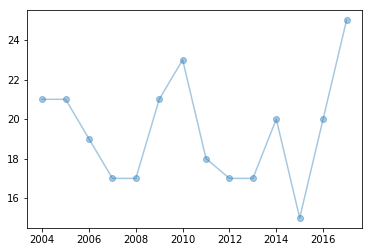

In [30]:

plt.plot('Year','Estimate',data=london_lambeth, marker='o', alpha=0.4,label='Lambeth')